In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import numpy as np  
import pandas as pd 
import os

import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,roc_auc_score,average_precision_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from itertools import cycle
from sklearn.metrics import auc,roc_curve,roc_auc_score

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings("ignore")

In [56]:

data_train = pd.read_csv('C:/Python/NSL_KDD/V2_traffic_prediction/M_Dataset_2_70.csv', header=None)
data_test = pd.read_csv('C:/Python/NSL_KDD/V2_traffic_prediction/M_Dataset_2_30.csv', header=None)
data= pd.concat([data_train, data_test], ignore_index=True)

In [57]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10/1/2020 5:02,268599,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
1,192.168.3.130-200.175.2.130-3632-33747-6,200.175.2.130,33747,192.168.3.130,3632,6,10/1/2020 5:02,22194,5,5,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
2,192.168.3.130-200.175.2.130-8180-37217-6,200.175.2.130,37217,192.168.3.130,8180,6,10/1/2020 1:39,8782,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
3,192.168.3.130-200.175.2.130-8180-35921-6,200.175.2.130,35921,192.168.3.130,8180,6,10/1/2020 1:39,4047,2,2,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
4,192.168.3.130-200.175.2.130-8180-43053-6,200.175.2.130,43053,192.168.3.130,8180,6,10/1/2020 1:39,3819,2,2,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
5,192.168.3.130-200.175.2.130-8180-46611-6,200.175.2.130,46611,192.168.3.130,8180,6,10/1/2020 1:39,8019,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
6,192.168.3.130-200.175.2.130-8180-37249-6,200.175.2.130,37249,192.168.3.130,8180,6,10/1/2020 1:39,4372,2,2,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
7,192.168.3.130-200.175.2.130-8180-43395-6,200.175.2.130,43395,192.168.3.130,8180,6,10/1/2020 1:39,10376,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
8,192.168.3.130-200.175.2.130-8180-42741-6,200.175.2.130,42741,192.168.3.130,8180,6,10/1/2020 1:39,6919,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
9,192.168.3.130-200.175.2.130-8180-36091-6,200.175.2.130,36091,192.168.3.130,8180,6,10/1/2020 1:39,6747,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205166 entries, 0 to 205165
Data columns (total 84 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       205166 non-null  object 
 1   1       205166 non-null  object 
 2   2       205166 non-null  int64  
 3   3       205166 non-null  object 
 4   4       205166 non-null  int64  
 5   5       205166 non-null  int64  
 6   6       205166 non-null  object 
 7   7       205166 non-null  int64  
 8   8       205166 non-null  int64  
 9   9       205166 non-null  int64  
 10  10      205166 non-null  int64  
 11  11      205166 non-null  int64  
 12  12      205166 non-null  int64  
 13  13      205166 non-null  int64  
 14  14      205166 non-null  float64
 15  15      205166 non-null  float64
 16  16      205166 non-null  int64  
 17  17      205166 non-null  int64  
 18  18      205166 non-null  float64
 19  19      205166 non-null  float64
 20  20      205166 non-null  float64
 21  21      20

In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
2,205166.0,1.751495e+04,2.246783e+04,0.0,0.0,80.0,40665.75,65518.0
4,205166.0,1.078671e+04,1.829842e+04,0.0,0.0,53.0,9731.75,60998.0
5,205166.0,5.671900e+00,5.725582e+00,0.0,0.0,6.0,6.00,17.0
7,205166.0,1.013933e+07,2.621894e+07,-154.0,20.0,2958.0,27411.50,119999993.0
8,205166.0,4.555565e+00,6.530824e+01,0.0,0.0,0.0,3.00,16928.0
...,...,...,...,...,...,...,...,...
78,205166.0,3.674729e+04,6.191349e+05,0.0,0.0,0.0,0.00,104000000.0
79,205166.0,6.931384e+06,1.882799e+07,0.0,0.0,0.0,0.00,120000000.0
80,205166.0,2.106451e+05,2.048705e+06,0.0,0.0,0.0,0.00,73000000.0
81,205166.0,7.126149e+06,1.913443e+07,0.0,0.0,0.0,0.00,120000000.0


In [60]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
79    0
80    0
81    0
82    0
83    0
Length: 84, dtype: int64

In [61]:
data.drop_duplicates(inplace=True)

In [62]:
print('ДУбликатов в data: ',data.duplicated().sum())

ДУбликатов в data:  0


In [63]:
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        
X = data.iloc[:,0:83]
Y = data.iloc[:,83:84]

scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

y_train1 = np.array(Y)

y_data= to_categorical(y_train1)
X_data = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))

In [64]:
X_data.shape

(205165, 83, 1)

In [65]:
y_data.shape

(205165, 6)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.20, random_state=577)
print(X_train.shape,'\n',X_test.shape)

(164132, 83, 1) 
 (41033, 83, 1)


In [67]:
model = Sequential()
model.add(Conv1D(64, 3, padding="same",strides=1,activation="relu",input_shape=(83, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))#128
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 83, 64)            256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 64)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2624)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1344000   
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                      

In [69]:
result= model.fit(X_train, y_train,
                #validation_split=0.30
                validation_data=(X_test,y_test )
                ,epochs=2, batch_size=32) #epochs=20

Epoch 1/2
5130/5130 [==============================] - 135s 26ms/step - loss: 0.0444 - accuracy: 0.9878 - val_loss: 0.0137 - val_accuracy: 0.9961
Epoch 2/2
5130/5130 [==============================] - 135s 26ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.0069 - val_accuracy: 0.9980


In [70]:
y_pred = model.predict(X_test) #probabilty
y_pred = (y_pred > 0.5)

history=result

print(history)

1283/1283 [==============================] - 4s 3ms/step


In [71]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [72]:
expected = y_test
cmatrix = confusion_matrix(expected.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix')
print(cmatrix)

Confusion Matrix
[[   63     0     0     0     0     0]
 [    1 14677     2     7     1     0]
 [   27     0   176     3     4     0]
 [    1     0    19 13752     6     0]
 [    7     0     2     3 12280     0]
 [    0     0     0     2     0     0]]


In [73]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [74]:
print("accuracy :" , accuracy(cmatrix))

accuracy : 0.9979284965759266


In [99]:
print('Classification Report')

print(classification_report(expected, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        63
           1       1.00      1.00      1.00     14688
           2       0.88      0.84      0.86       210
           3       1.00      1.00      1.00     13778
           4       1.00      1.00      1.00     12292
           5       0.00      0.00      0.00         2

   micro avg       1.00      1.00      1.00     41033
   macro avg       0.80      0.80      0.80     41033
weighted avg       1.00      1.00      1.00     41033
 samples avg       1.00      1.00      1.00     41033



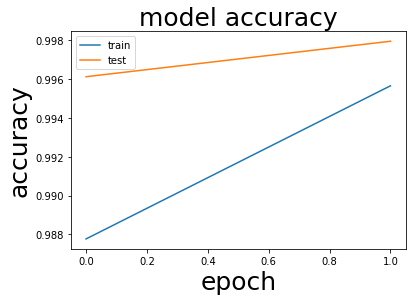

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy',fontsize=25)
plt.ylabel('accuracy',fontsize=25)
plt.xlabel('epoch',fontsize=25)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

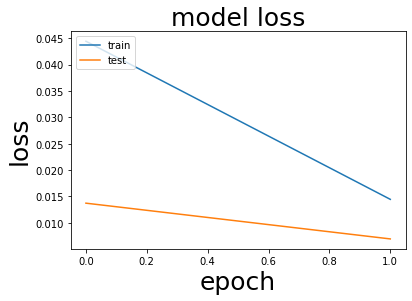

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss',fontsize=25)
plt.ylabel('loss',fontsize=25)
plt.xlabel('epoch',fontsize=25)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'True Positive Rate')

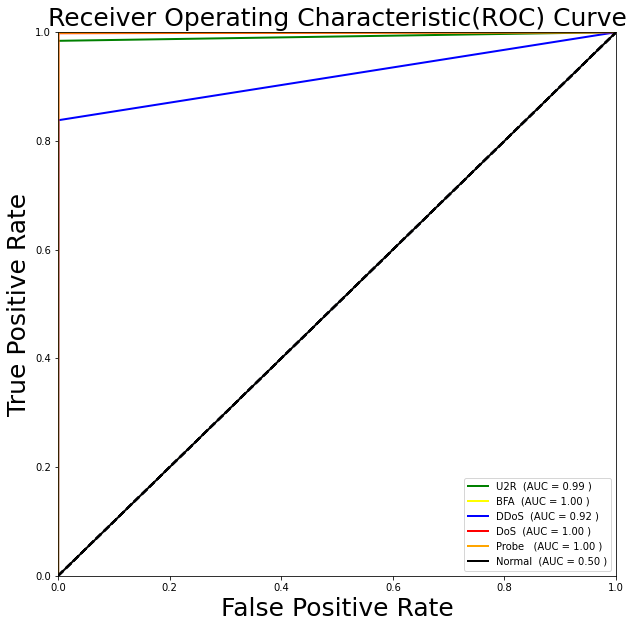

In [94]:
lb = LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
y_pred = lb.transform(y_pred)
    
fpr = dict()
tpr = dict()
roc_auc = dict()
    
for i in range(6):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i].astype(int), y_pred[:,i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))
lw = 2
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
target_classes = ['U2R','BFA','DDoS','DoS', 'Probe ','Normal']

plt.title('Receiver Operating Characteristic(ROC) Curve',fontsize=25)
plt.legend(loc="lower right")
colors = cycle(['green', 'yellow', 'blue', 'red', 'orange','black'])
 
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label= target_classes[i] + " "' (' 'AUC = {1:0.2f} )'''.format(i, roc_auc[i]))
            
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)